![delensalot logo](./../../res/dlensalot2.PNG)

# Interactive minimal working example - generate simulations
In this notebook, you generate lensed CMB simulations on the full sky inclusive of isotropic white noise and without foregrounds.
At the end of this tutorial, you will plot the power spectra of the CMB and lensing potential realizations.

All parameters are set via a configuration file [here](https://github.com/NextGenCMB/delensalot/blob/main/first_steps/notebooks/conf_mwe_simgen.py), and you can freely change the parameters to your liking.
If not set, attributes default to the 'P_FS_CMBS4'-default configuration 'DL_DEFAULT_CMBS4_FS_P' [here](https://github.com/NextGenCMB/delensalot/blob/simgenjob/delensalot/lerepi/core/metamodel/__init__.py).

The configuration file consists of,
 * `DLENSALOT_Job` delensalot can do a few things, and here we choose one of its sub routines, `generate_sim`
 * `DLENSALOT_Analysis` collects all configurations for the analysis of the simulations
 * `DLENSALOT_Data` configures the simulations which are used. In this minimal working example, we generate the simulation data on the fly and therefore need to choose the simulation module and a few parameters for this

In [1]:
from IPython.display import clear_output
from datetime import datetime
import os
from os.path import join as opj
if "SCRATCH" not in os.environ:
    # By default, data will be stored right at the current working directory. However, this may not be a safe place, so perhaps choose something else
    # os.environ["SCRATCH"] = "./SCRATCH"
    os.environ["SCRATCH"] = "/mnt/c/Users/sebas/OneDrive/SCRATCH"

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from delensalot.run import run

fn = opj(os.getcwd(), 'conf_mwe_simgen.py')

cond4mpi does not exists. No MPI loaded
mpi.py: Plancklens.mpi disabled as per environ variable 



In [2]:
delensalot_runner = run(config_fn=fn, job_id='generate_sim', verbose=False)
delensalot_runner.run()
ana_mwe = delensalot_runner.init_job()

clear_output(wait=True)
print("Cell finished {}".format(datetime.now().strftime("%H:%M:%S")))

Cell finished 13:23:56


# Plot your results
All products are easily accessible, and all simulation-objects and functions are stored in the `_sims`-attribute.
If you'd like to access the 'observed' maps, i.e. the ones inclusive of noise, you can access them via `.sims`

In [9]:
CMB_lenlm = [ana_mwe._sims.get_sim_elm(0), ana_mwe._sims.get_sim_blm(0)]
CMB_obslm = hp.map2alm_spin(ana_mwe.sims.get_sim_pmap(0), 2, lmax=ana_mwe._sims.lmax)
plm_in = ana_mwe._sims.get_sim_plm(0)

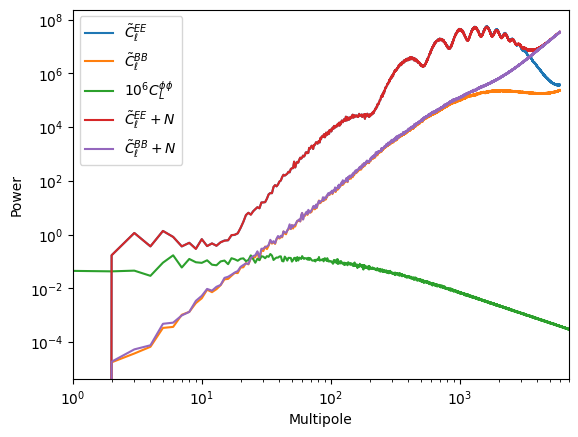

In [16]:
ll = np.arange(0,ana_mwe._sims.lmax+1,1)
LL = np.arange(0,ana_mwe._sims.lmax+ana_mwe._sims.dlmax+1,1)
scale_factor_l = (ll*(ll+1))**2/(2*np.pi)
scale_factor_L = (LL*(LL+1))**2/(2*np.pi)*1e6

plt.plot(scale_factor_l*hp.alm2cl(CMB_lenlm[0]), label=r'$\tilde{C}_\ell^{EE}$')
plt.plot(scale_factor_l*hp.alm2cl(CMB_lenlm[1]), label=r'$\tilde{C}_\ell^{BB}$')
plt.plot(scale_factor_L*hp.alm2cl(plm_in), label=r'$10^6C_L^{\phi\phi}$')

plt.plot(scale_factor_l*hp.alm2cl(CMB_obslm[0], lmax_out=ana_mwe._sims.lmax), label=r'$\tilde{C}_\ell^{EE}+N$')
plt.plot(scale_factor_l*hp.alm2cl(CMB_obslm[1], lmax_out=ana_mwe._sims.lmax), label=r'$\tilde{C}_\ell^{BB}+N$')

plt.xlabel('Multipole')
plt.ylabel('Power')
plt.xlim(1e0,ana_mwe._sims.lmax+ana_mwe._sims.dlmax)
plt.loglog()
plt.legend()

This concludes the tutorial. If you'd like to see how to delens the simulations you generate, go check out [this notebook](https://github.com/NextGenCMB/delensalot/blob/main/notebooks/examples/interactive_mwe.py).

# Summary and next steps
This tutorial demonstrated how to generate lensed simulation data.

To learn how to use `delensalot` for lensing reconstruction and more, check out the other tutorials, or see the [documentation](link_to_rtd_doc), or [github](https://github.com/NextGenCMB/delensalot).